In [5]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#leer el archivo
data = pd.read_csv("articulos_ml.csv")
#visualizamos el tamaño
data.shape

(161, 8)

In [8]:
#imprimimos las primeras 5 columnas
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [9]:
#obtener resultados de estadistica básica
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

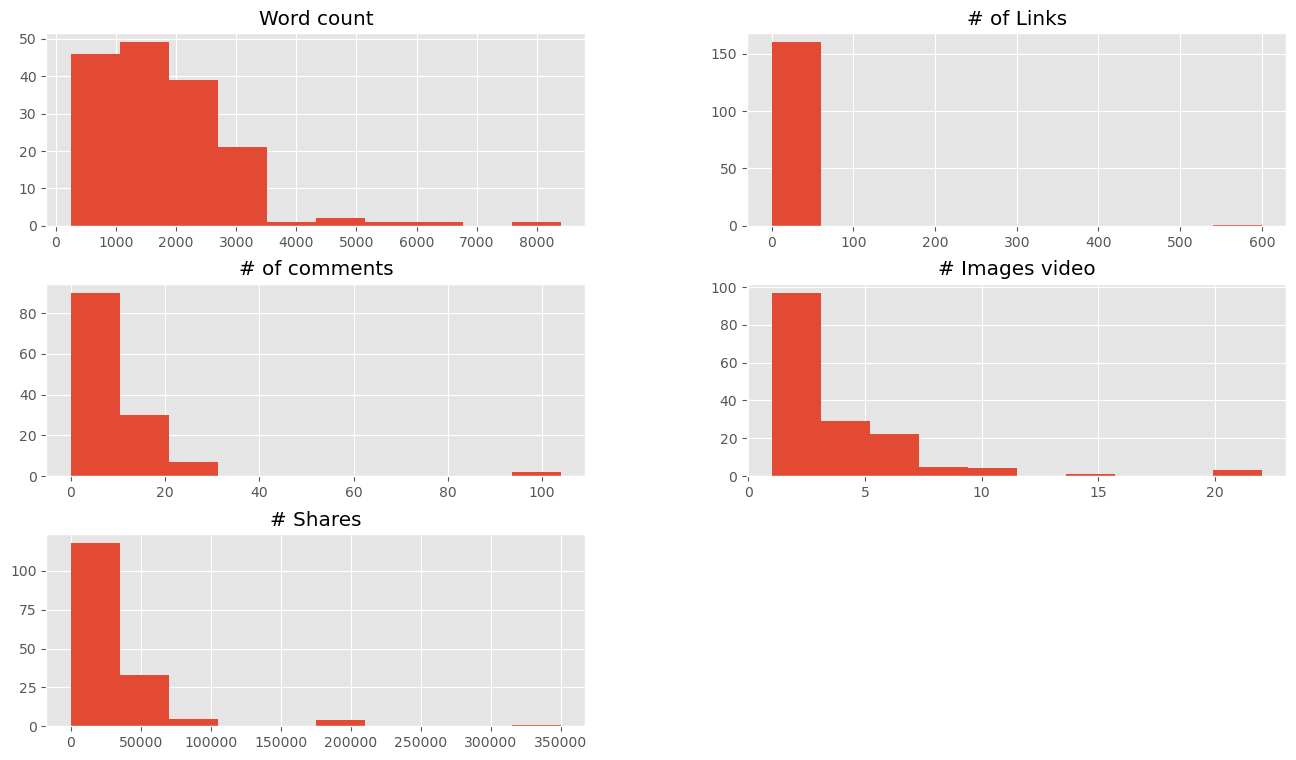

In [10]:
#Obtener correlacion entre palabras y los shares 
data.drop(['Title','url', 'Elapsed days'], axis=1).hist()
plt.show

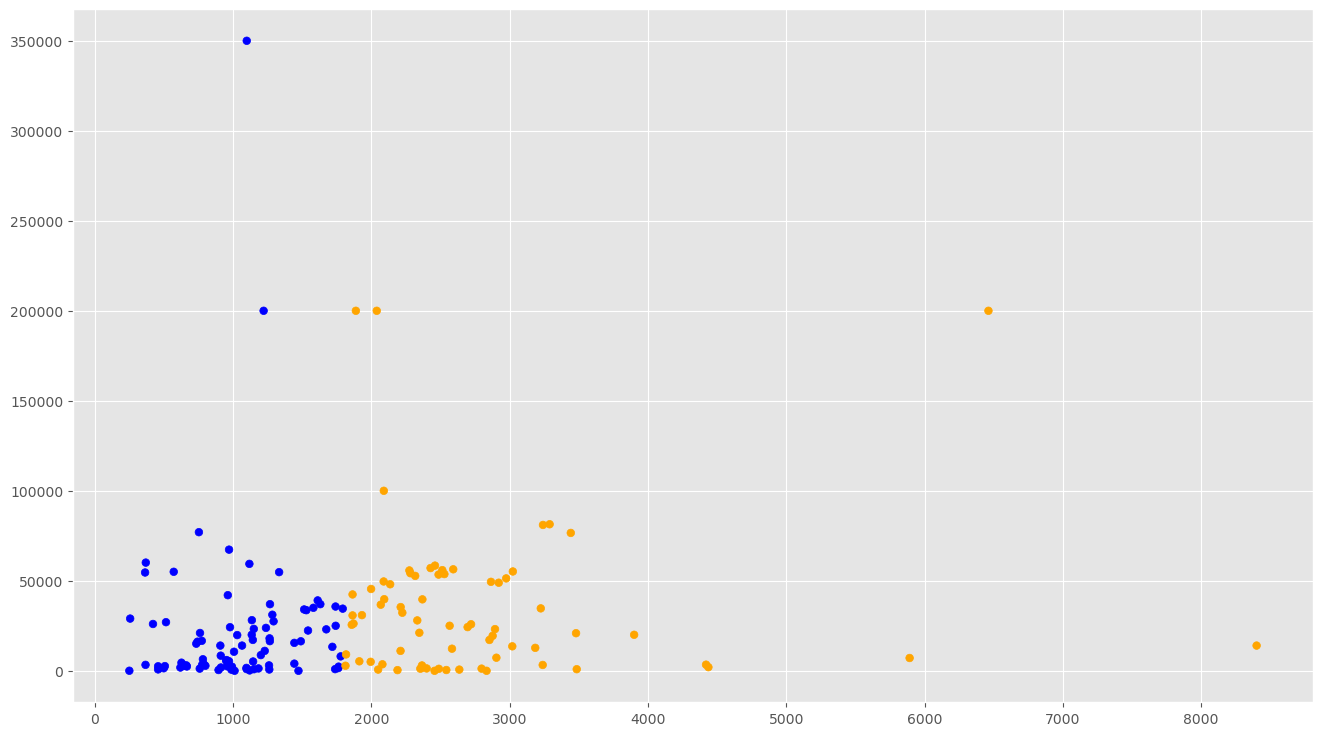

In [12]:
#vamos a filtrar las palabras para obtener los registros de <3500 
# así como los registros que tengan <80,000 shares
colores=['orange','blue']
tamanios=[30,60]
f1 = data['Word count'].values
f2 = data['# Shares'].values
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

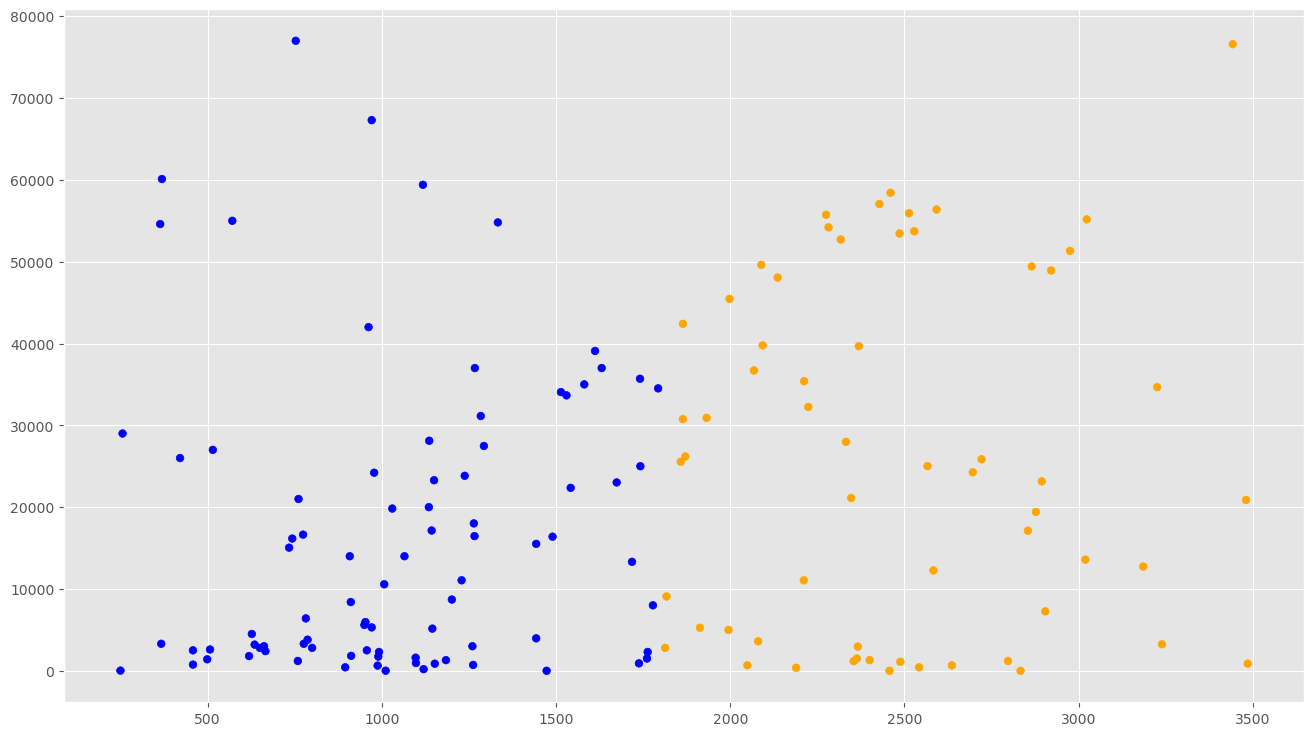

In [14]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [15]:
#se muestran como los valores cambian ya filtrados 
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [16]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


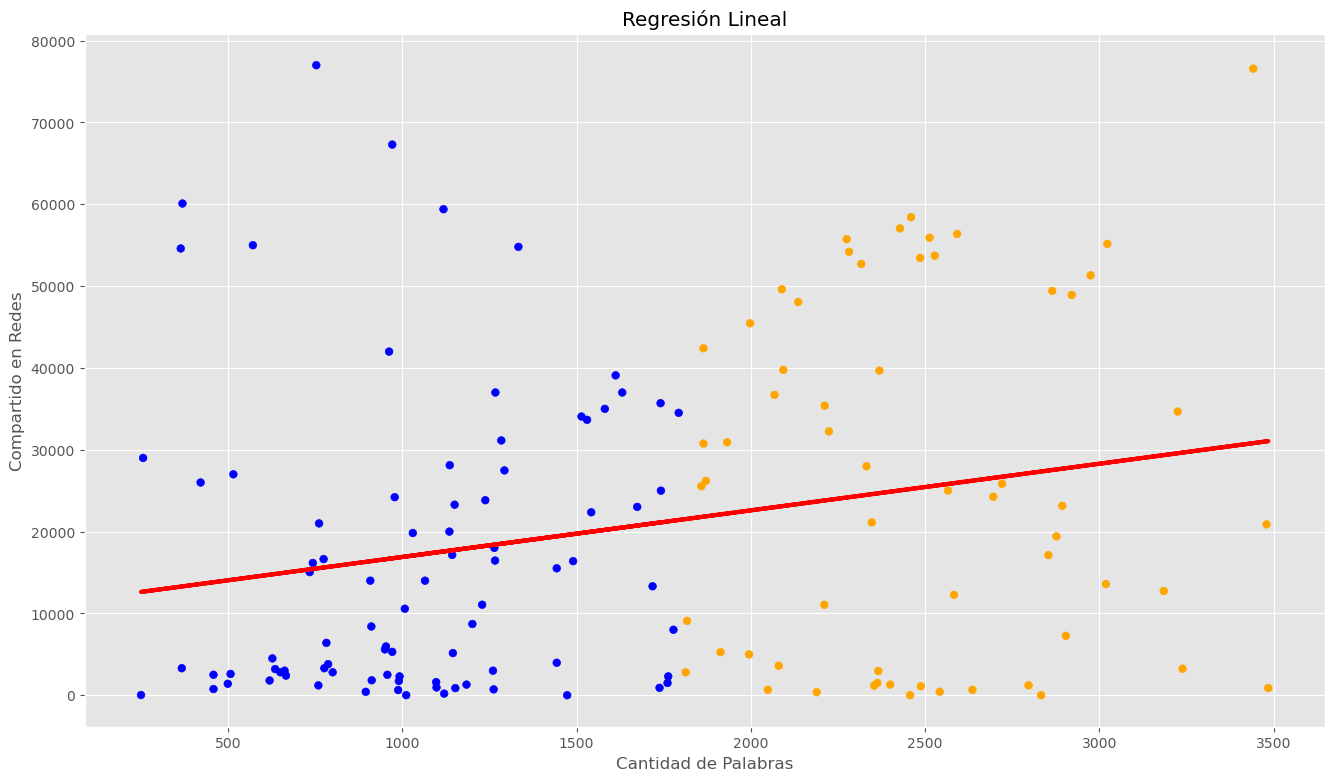

In [17]:
#mostrar gráfica con la linea
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.show()

In [18]:
#prediccion de shares por un art. 2000 palabraas
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


/var/folders/5n/yw6j7s2n0d75d_bx5pnw2bkr0000gn/T/ipykernel_9717/4196709388.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


In [20]:
#vamos a graficar en 3Ds
# haremos una variable nueva que será la suma de los enlaces,
# comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) +
filtered_data['# Images video'])
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [21]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


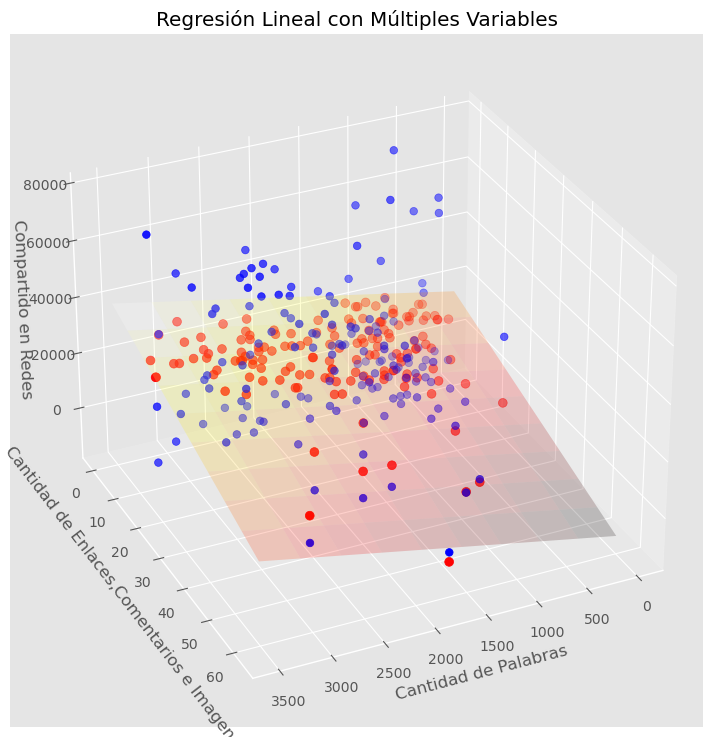

In [22]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [23]:
#predecir cuántos Shares se obtienen por un artículo con 2000, con 10 enlaces, 4 comentarios y 6 imágenes
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


/var/folders/5n/yw6j7s2n0d75d_bx5pnw2bkr0000gn/T/ipykernel_9717/3648231557.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_Dosmil))


In [24]:
#restar los errores que se generan durante los cálculos
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [25]:
#calculamos la mejora de la variamza 
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)

0.052615337462582956


In [26]:
#mejora en la predicción de un artículo de 2.000 palabras
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir))

-2077


/var/folders/5n/yw6j7s2n0d75d_bx5pnw2bkr0000gn/T/ipykernel_9717/2665675938.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(diferenciaComparir))


#Respuestas de las preguntas - Gina Barraza
1. Porque podemos predecir cuantos sahres tendrá algun artículo, solo tomando en cuenta la cantidad de palabras.

2. La mayoría de los articulos tienen de 1000 - 3000 palabras, no tienen tantos shares, los articulos que tienen muchas palabras y muchos shares son muy pocos

3. Eliminar los valores extremos que afectan el modelo y lo distorcionan. Despues de filtrar, los datos quedaron más concetrados con menos dispersión.

4. Porque la mayoría de los artículos tienen entre 1000-2000 palabras y pocos shares, mientras que los artículos virales o extensos son muy pocos. Afecta negativamente porque la linea busca ajustarse a todos los valores y por ende no se representan los datos de las mejor manera.

5. Muestra cuantos shares se esperan por cada palabra extra que se agregue al artículo.

6. Que había bastante dispersión en los datos.

7. No, porque si obtenemos un r2 bajo indica que la cantidad de palabras explica muy poco la variabilidadd en los shares. Existen otros factores más importantes que determinan cuantas veces se comparte un artículo, como el contenido, autor, título llamativo, etc.

8. No hay diferencias importantes en la dispersión de ambos grupos; Articylos cortos como largos tienen variabilidad en los shares, lo que confirma que las palabras no son determinantes para que un usuario lo comparta o no.

9. No, los puntos están muy separados de la linea; Esto indica que las predicciones serán poco precisas, y por ende el error es alto y la r2 es baja.